In [1]:
import warnings
import pandas as pd
import arviz as az

import os, sys
dir2 = os.path.abspath('')
dir1 = os.path.dirname(dir2)
if not dir1 in sys.path: sys.path.append(dir1)
from libs.model import HGPforecaster
from libs.metrics import calculate_metrics, metrics_to_table
from libs.pre_processing import generate_groups_data
from libs.visual_analysis import visualize_fit, visualize_predict
az.style.use('arviz-darkgrid')
warnings.filterwarnings('ignore')

In [2]:
prison = pd.read_csv('../data/prisonLF.csv', sep=",")
prison = prison.drop('Unnamed: 0', axis =1)
prison['t'] = prison['t'].astype('datetime64[ns]')

In [3]:
prison_pivot = prison.pivot(index='t',columns=['state', 'gender', 'legal'], values='count')

In [4]:
groups_input = {
    'state': [0],
    'gender': [1],
    'legal': [2]
}

In [5]:
groups = generate_groups_data(prison_pivot, groups_input, seasonality=4, h=8)

Number of groups: 3
	state: 8
	gender: 2
	legal: 2
Total number of series: 32
Number of points per series for train: 40
Total number of points: 48
Seasonality: 4
Forecast horizon: 8


In [6]:
m = HGPforecaster(groups_data=groups)
m.fit()

Fitting model...



Sampling...


In [7]:
m.predict()

Sampling...


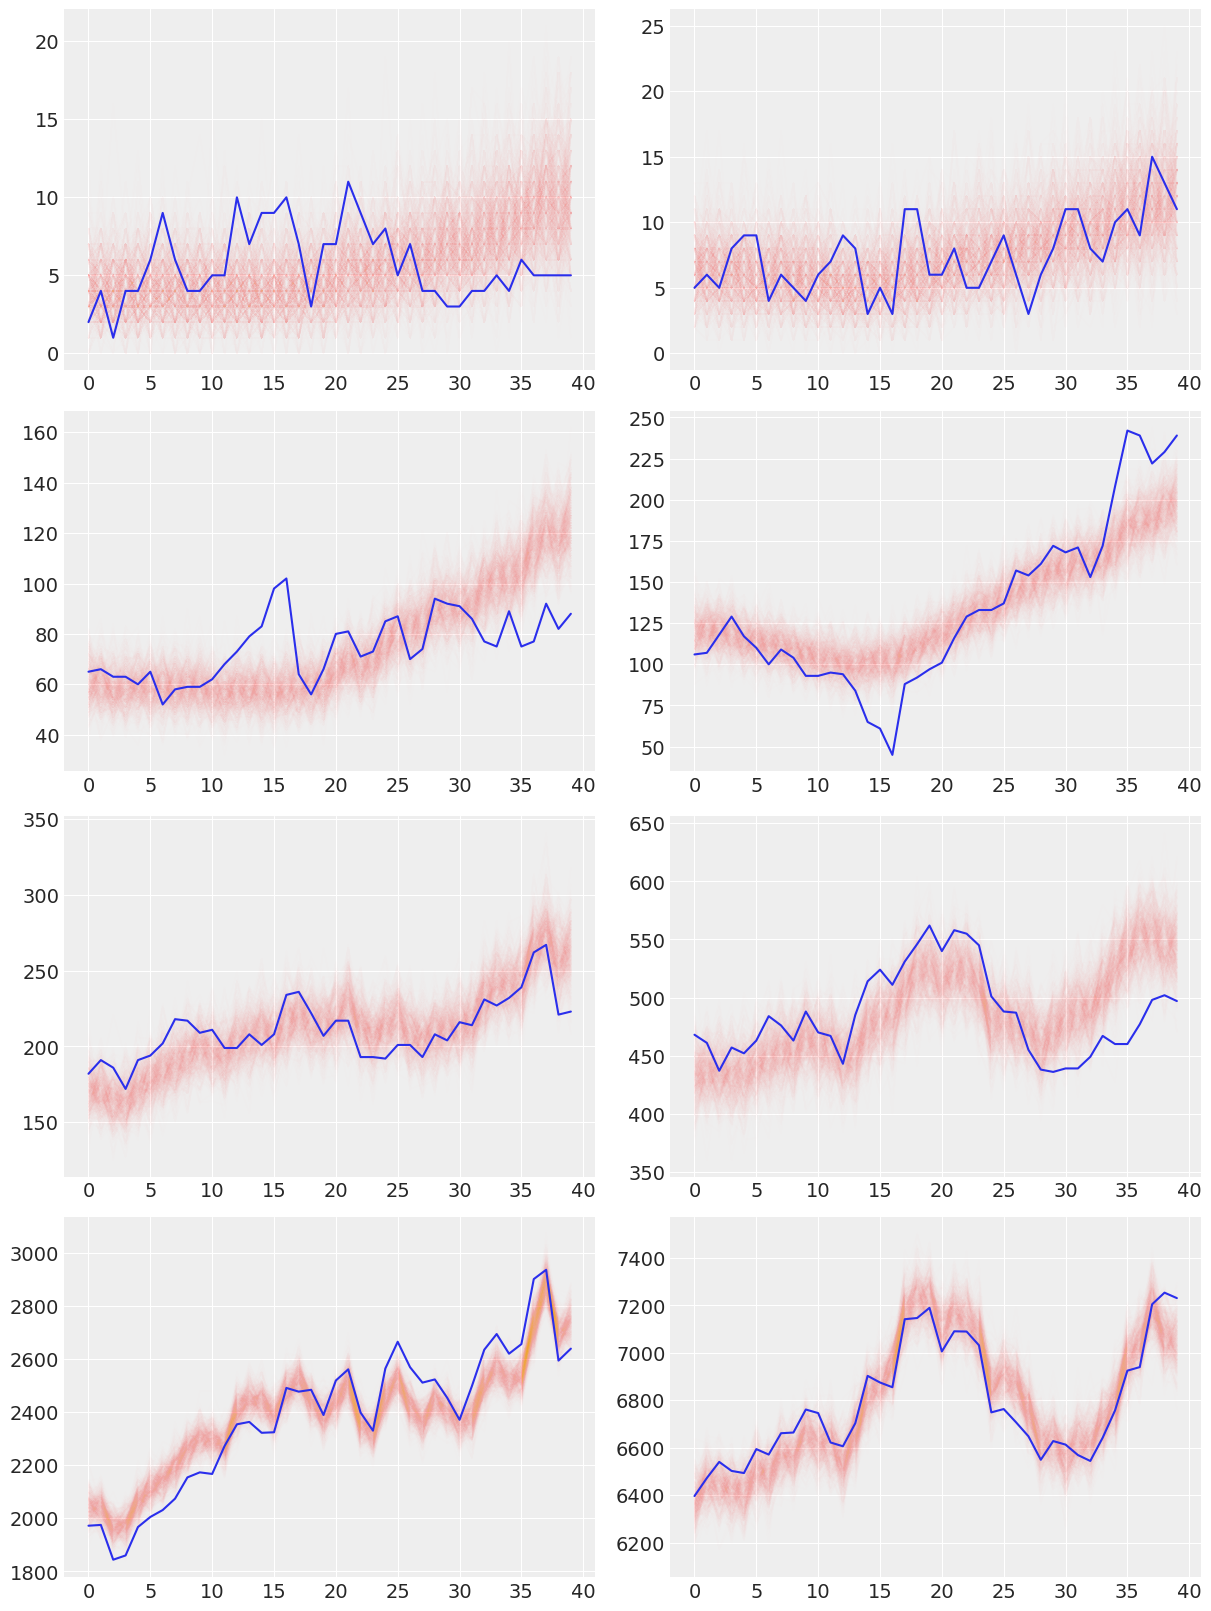

In [8]:
visualize_fit(groups, m.pred_samples_fit, 8)

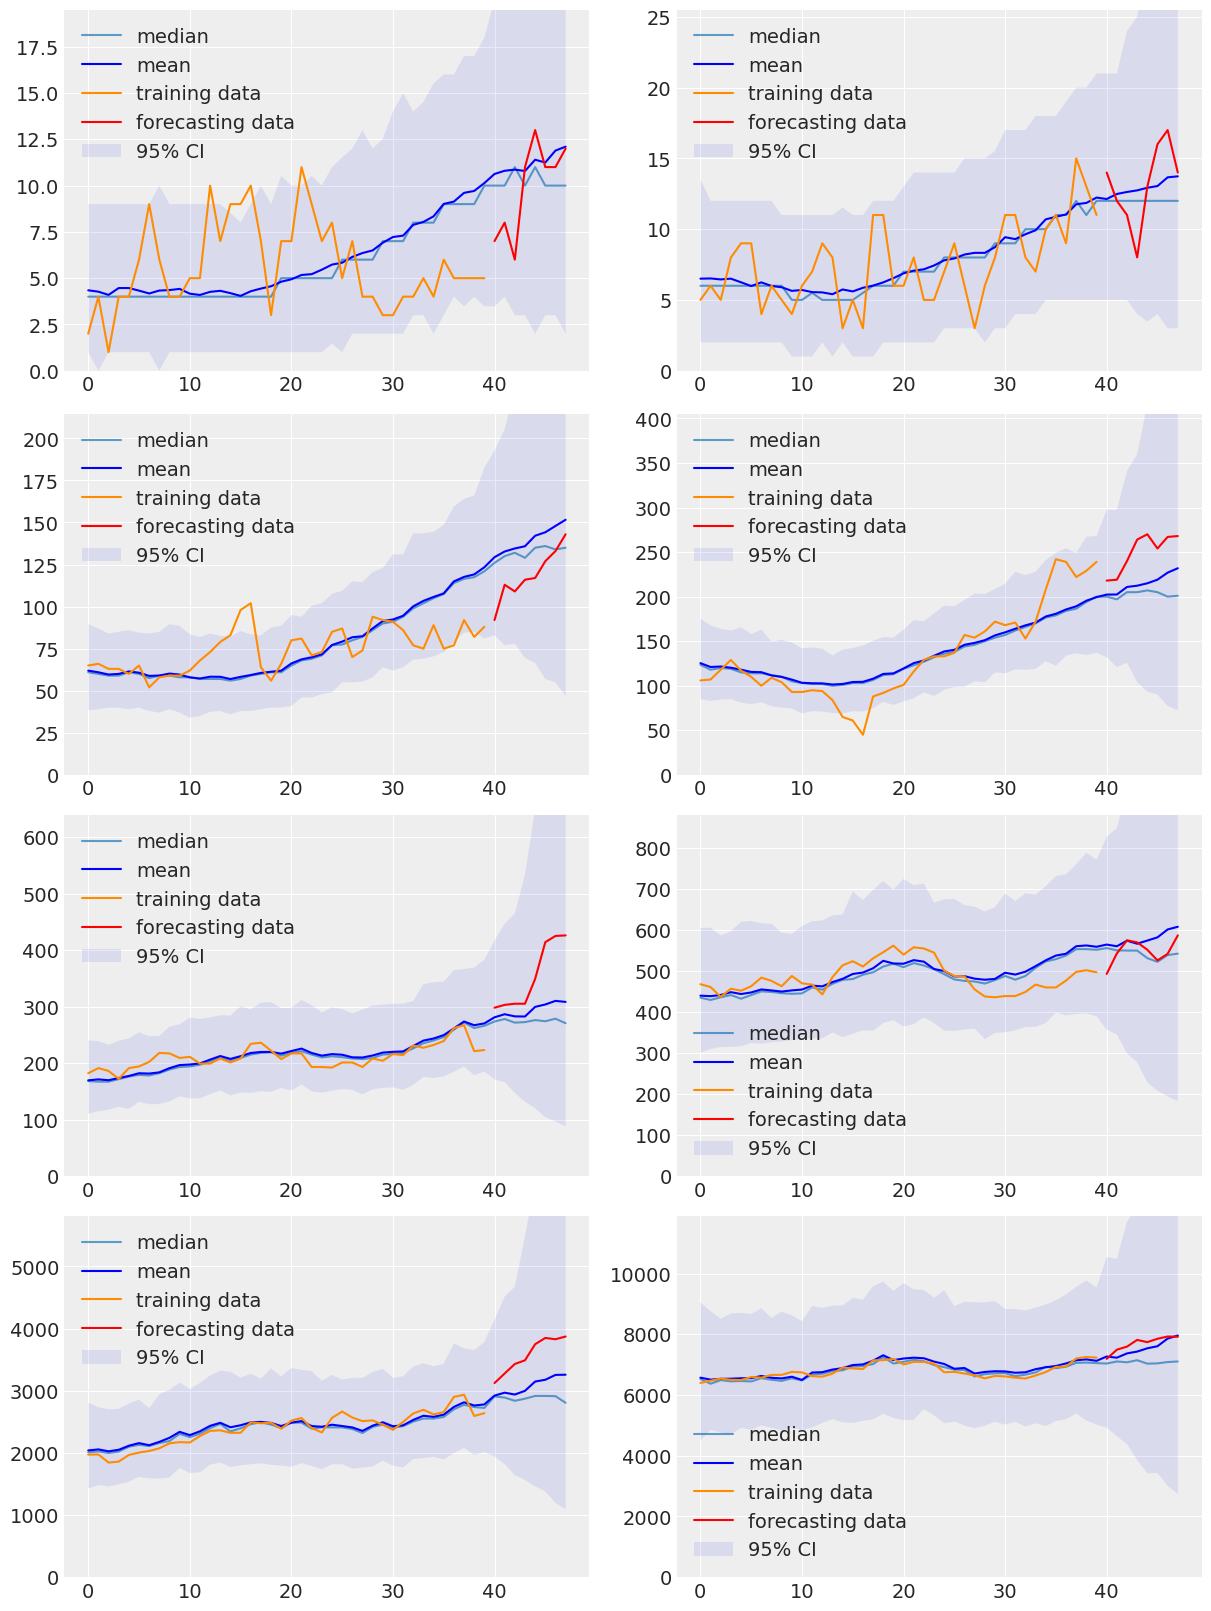

In [9]:
visualize_predict(groups, m.pred_samples_predict, 8)

In [10]:
results = calculate_metrics(m.pred_samples_predict, groups)

In [11]:
metrics_to_table(groups, results)

,bottom,total,state,gender,legal,all
mase,2.169,0.731,1.666,0.49,2.726,2.009
rmse,133.879,979.621,326.658,504.402,1723.179,227.851
